In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part-1: data Exploration and Pre-processing

# 1) Load the given dataset

In [2]:
df=pd.read_csv("Python_Linear_Regres.csv")

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# 2) Fill Null value of experience column with the value 0

In [4]:
df["experience"]=df["experience"].fillna("zero")

In [5]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# 3) Replace the Null values of the column test score with mean value

In [6]:
df["test_score(out of 10)"]=df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].mean())

In [7]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


# 4) Display a scatter plot between experience and Salary

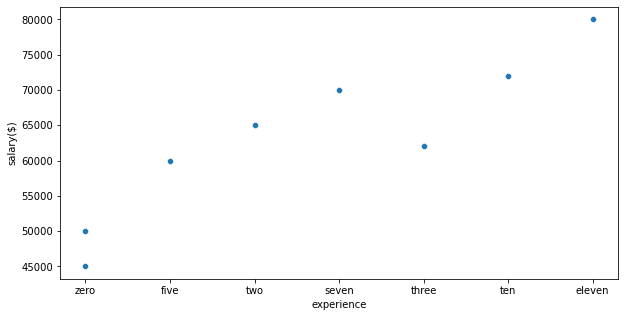

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="experience",y="salary($)",data=df);

# 5) Display a scatter plot between test score and Salary

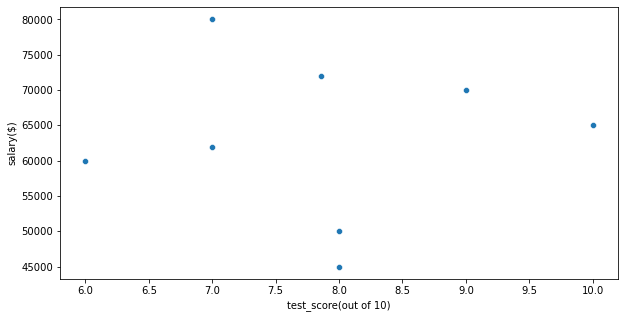

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="test_score(out of 10)",y="salary($)",data=df);

# 6) Display a scatter plot between interview score and Salary

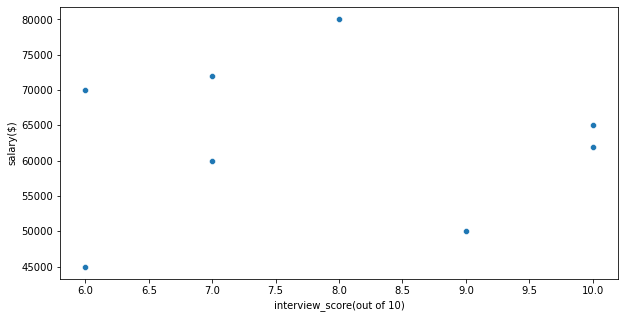

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="interview_score(out of 10)",y="salary($)",data=df);

# 7) Display bar plot for experience

Text(0, 0.5, 'counts')

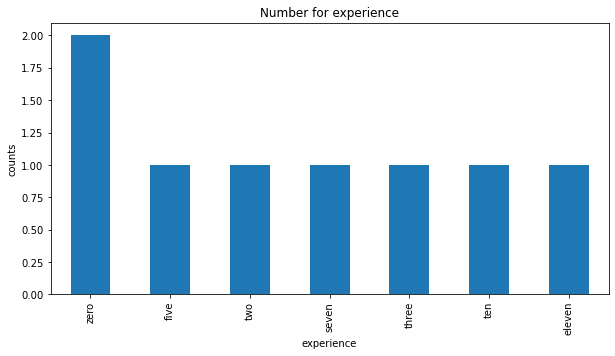

In [11]:
x = df['experience'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="Number for experience")
x.set_xlabel("experience")
x.set_ylabel("counts")

In [12]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [14]:
df["experience"]=df["experience"].replace(["zero","zero","five","two","seven","three","ten","eleven"],[0,0,5,2,7,3,10,11])

In [15]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


## Part-2: Working with Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# 1) Separate feature data from target data

In [21]:
Y=df["salary($)"]
Y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [22]:
X=df.drop(["salary($)"],axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


# 2) Create a Linear regression model between Features and target data

In [23]:
regression_model = LinearRegression() 

In [24]:
regression_model.fit(X,Y)

LinearRegression()

In [35]:
salary_predicted=regression_model.predict(X)

In [36]:
salary_predicted

array([52313.61238494, 45722.68644263, 58231.95591138, 63991.7318464 ,
       67429.06277517, 61080.55179794, 75922.72532666, 79307.67351488])

# 3) Display the test score and training score

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
mse=mean_squared_error(Y,salary_predicted)
mse

4167481.961463808

In [40]:
r2=r2_score(Y,salary_predicted)
r2

0.9639958361860578

# 4) Extract slope and intercept value from the model

In [42]:
slope=regression_model.coef_
slope

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [44]:
intercept=regression_model.intercept_
intercept

17237.3303137272

# 5) Display Mean Squared Error

In [46]:
mse=mean_squared_error(Y,salary_predicted)
mse

4167481.961463808

# 6) Display Mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error

In [50]:
mae=mean_absolute_error(Y,salary_predicted)
mae

1739.7560385573815

# 7) Display Root mean Squared error

In [52]:
mse=mean_squared_error(Y,salary_predicted)
mse

4167481.961463808

In [54]:
rmse=np.sqrt(mse)
rmse

2041.4411481754275

# 8) Display R2 score

In [56]:
r2=r2_score(Y,salary_predicted)
r2

0.9639958361860578